In [1]:
import csgm
import image_utils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
import tensorflow_hub as hub
import warnings
warnings.filterwarnings('ignore')

W0326 02:09:57.667007 139919959631616 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:
G = hub.Module('https://tfhub.dev/deepmind/biggan-256/2')

In [3]:
tensors = csgm.create_graph(G)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0326 02:10:05.790148 139919959631616 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


In [4]:
img = image_utils.transform_img_fast('./dog.png')
segments = skimage.segmentation.quickshift(img, kernel_size=4, max_dist=200, ratio=0.2)

In [5]:
mask_new, mask = image_utils.create_mask(img,segments)

In [6]:
target = img * mask_new

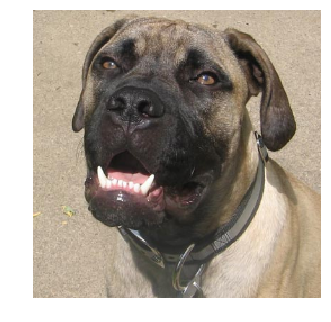

In [7]:
image_utils.ShowImageNoAxis(target)

## Training

In [8]:
config=tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [9]:
sess.run(tf.initializers.global_variables())

In [10]:
n_iterations = 250

In [11]:
tensors

{'target': <tf.Tensor 'Placeholder:0' shape=(256, 256, 3) dtype=float32>,
 'filter': <tf.Tensor 'Placeholder_1:0' shape=(256, 256, 3) dtype=float32>,
 'class_': <tf.Tensor 'Placeholder_3:0' shape=<unknown> dtype=int32>,
 'init_z': <tf.Tensor 'Placeholder_2:0' shape=(1, 140) dtype=float32>,
 'z': <tf.Variable 'Variable:0' shape=(1, 140) dtype=float32_ref>,
 'loss': <tf.Tensor 'mean_squared_error/value:0' shape=() dtype=float32>,
 'opt': <tensorflow.python.training.momentum.MomentumOptimizer at 0x7f418c2ffcc0>,
 'min_': <tf.Operation 'Momentum' type=NoOp>,
 'sample': <tf.Tensor 'Squeeze:0' shape=(256, 256, 3) dtype=float32>}

In [12]:
last_z = None
z = np.random.normal(0,1,size=(1,140))
for i in range(n_iterations):
    last_z = z
    loss,_,z = sess.run([tensors['loss'],tensors['min_'],tensors['z']], feed_dict = {tensors['target']:target, 
                                                                       tensors['filter']: mask_new, 
                                                                       tensors['class_']: [239],
                                                                       tensors['init_z']: z})
    if i % 50 == 0:
        print(i, loss)

0 0.69167185
50 0.21935312
100 0.15138054
150 0.13581264
200 0.12499724


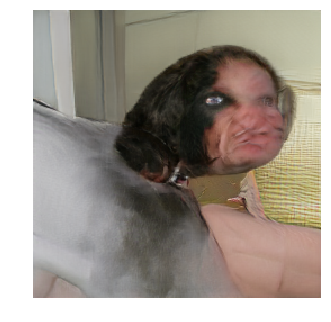

In [14]:
sample = sess.run([tensors['sample']], feed_dict = {tensors['target']:target, 
                                                   tensors['filter']: mask_new, 
                                                   tensors['class_']: [239],
                                                   tensors['init_z']: z})
image_utils.ShowImageNoAxis(sample[0])